import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams['axes.spines.top'] = 0
mpl.rcParams['axes.spines.right'] = 0
mpl.rcParams['axes.spines.left'] = 1
mpl.rcParams['axes.spines.bottom'] = 1
mpl.rcParams.update({'font.size': 12})

In [5]:
image_size = (250, 250)
scale = 0

noise = np.zeros((2, *image_size))

noise[0] = scale * np.random.randn(*image_size)
noise[1] = scale * np.random.randn(*image_size)

# noise[1] = -noise[0] # homework

from pathlib import Path
result = list(Path('./book_data/lfw/').rglob('*.jpg'))

n_train = 1000
n_test = 100
images = np.zeros((n_train, 250, 250))
labels = np.zeros((n_train,), dtype=np.int8)

images_test = np.zeros((n_test, 250, 250))
labels_test = np.zeros((n_test,), dtype=np.int8)

shuffle_idx = np.random.permutation(n_train + n_test)
for i in range(n_train):
    images[i] = plt.imread(result[shuffle_idx[i]]).mean(axis=2)
    labels[i] = np.round(np.random.rand())
    images[i] += noise[labels[i]]

for i in range(n_train, n_train + n_test):
    images_test[i - n_train] = plt.imread(result[shuffle_idx[i]]).mean(axis=2)
    labels_test[i - n_train] = np.round(np.random.rand())
    # no noise in the test set!

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In [6]:
delta =np.zeros(11)
delta[5] = 1

In [100]:
h = np.cos(np.linspace(-np.pi/2,np.pi/2,7))


y = np.convolve(delta,h)

In [101]:
y

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 6.12323400e-17, 5.00000000e-01, 8.66025404e-01,
       1.00000000e+00, 8.66025404e-01, 5.00000000e-01, 6.12323400e-17,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00])

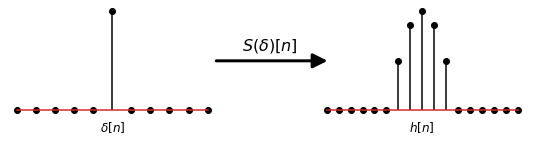

In [115]:
from matplotlib import patches, pyplot as plt

fig = plt.figure(figsize=(10,5))

# First subplot
ax1 = fig.add_subplot(121)
plt.stem(delta,linefmt='black',markerfmt='ko')

ax1.axis('off')
ax1.set_title(r'$\delta[n]$',y=-0.2)


# Second subplot
ax2 = fig.add_subplot(122)
plt.stem(y,linefmt='black',markerfmt='ko')
ax2.axis('off')
ax2.set_title(r'$h[n]$',y=-0.2)

# Add line from one subplot to the other
xyA = [9, 0.6]
#ax1.plot(*xyA, "o")
xyB = [1, 0.6]
#ax2.plot(*xyB, "o")
transFigure = fig.transFigure.inverted()
coord1 = transFigure.transform(ax1.transData.transform(xyA))
coord2 = transFigure.transform(ax2.transData.transform(xyB))
arrow = patches.FancyArrowPatch(
    coord1,  # posA
    coord2,  # posB
    shrinkA=0,  # so tail is exactly on posA (default shrink is 2)
    shrinkB=0,  # so head is exactly on posB (default shrink is 2)
    transform=fig.transFigure,
    color="black",
    arrowstyle="-|>",  # "normal" arrow
    mutation_scale=30,  # controls arrow head size
    linewidth=3,
    label='$S(\delta)[n]$',
)
fig.patches.append(arrow)
fig.tight_layout(pad=10)
leg = plt.legend(handles = [arrow], fontsize=16, frameon=False, loc=(-0.6, 0.5))
for item in leg.legendHandles:
    item.set_visible(False)

# Show figure
plt.show()

<StemContainer object of 3 artists>

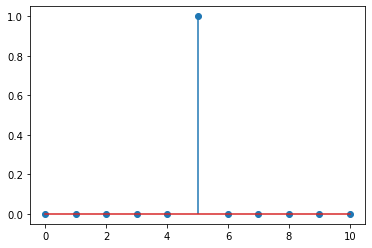

In [10]:
plt.stem(delta)